In [31]:
from graph2net.trainers import generate
from graph2net.archetypes import inception,resNet,resNeXt
from graph2net.graph_generators import show_cell, gen_cell
from graph2net.data_loaders import load_data, visualize_loader
import graph2net.notifier
from graph2net.notifier import notify_me
from graph2net.petri import create_gene_pool,run_petri, mutate_pool

from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging

pd.options.mode.chained_assignment = None 
logging.basicConfig(filename='logs/petri.log', level=logging.INFO)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
def list_flatten(l):
    return [item for sublist in l for item in sublist]

data = load_data(batch_size=256)
ground_truths = np.array(list_flatten([tgt.tolist() for img,tgt in data[1]]))

In [34]:
len(ground_truths)

10000

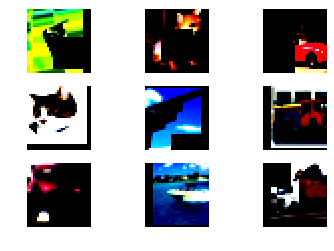

In [35]:
visualize_loader(data[0])

In [49]:
inclusions = [{"cell":inception,"genotype":'inception'},
              {"cell":resNeXt,"genotype":'resNeXt'},
              {"cell":resNet,"genotype":'resNet'}]

pool = create_gene_pool(47,node_range=[3,8],connectivity_range=[.25,.75],concat=.5,inclusions=inclusions)

In [50]:
pool

,adult,cell,correct,genotype,lineage,loss,mutations,name,offspring,preds,type
0,False,"[[0.0, 1.0, 10.0, 0.0], [0.0, 0.0, 13.0, 0.0],...",0,"n: 4, c: 0.526",[],0.0,0,Cody Blenheim Marc,0,[],sum
1,False,"[[0.0, 8.0, 14.0, 0.0], [1.0, 0.0, 15.0, 10.0]...",0,"n: 4, c: 0.446",[],0.0,0,MacMahon Dyke Carla,0,[],concat
2,False,"[[0.0, 4.0, 12.0, 0.0], [1.0, 0.0, 10.0, 0.0],...",0,"n: 4, c: 0.361",[],0.0,0,Sistine Lesbian Creon,0,[],concat
3,False,"[[0.0, 1.0, 5.0, 0.0, 0.0], [0.0, 0.0, 10.0, 0...",0,"n: 5, c: 0.456",[],0.0,0,Bosch Annie Leonid,0,[],sum
4,False,"[[0.0, 13.0, 0.0, 1.0, 0.0], [1.0, 0.0, 7.0, 0...",0,"n: 5, c: 0.335",[],0.0,0,MacKenzie Knowlton Madeleine,0,[],concat
5,False,"[[0.0, 1.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0], [1....",0,"n: 6, c: 0.742",[],0.0,0,Hoover Jehovah Beatrice,0,[],sum
6,False,"[[0.0, 12.0, 0.0, 4.0], [0.0, 0.0, 11.0, 6.0],...",0,"n: 4, c: 0.459",[],0.0,0,Caribbean Horton Gaston,0,[],sum
7,False,"[[0.0, 8.0, 1.0, 9.0, 0.0, 0.0, 15.0], [0.0, 0...",0,"n: 7, c: 0.68",[],0.0,0,Lear Annapolis McKay,0,[],sum
8,False,"[[0.0, 1.0, 1.0, 7.0, 9.0, 0.0], [0.0, 0.0, 0....",0,"n: 6, c: 0.324",[],0.0,0,Rochester Kant Bunsen,0,[],sum
9,False,"[[0.0, 1.0, 14.0], [0.0, 0.0, 5.0], [0.0, 0.0,...",0,"n: 3, c: 0.719",[],0.0,0,Bolshevist Acadia Orr,0,[],sum


In [51]:
adult_df_1  = run_petri(pool,data=data,connectivity='linear',cell_types=[1,1],scale=2,epochs=1,verbose=False)
adult_df_5 =  run_petri(pool,data=data,connectivity='linear',cell_types=[1,1],scale=2,epochs=5,verbose=False)
adult_df_10 = run_petri(pool,data=data,connectivity='linear',cell_types=[1,1],scale=2,epochs=10,verbose=False)

In [57]:
adult_df_1['correct_10']=adult_df_10['correct']
adult_df_1['correct_5'] =adult_df_5['correct']

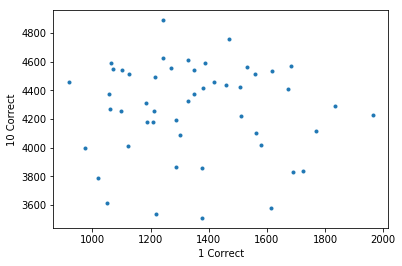

In [63]:
plt.plot(adult_df_1['correct'],adult_df_1['correct_5'],".")
plt.xlabel("1 Correct")
plt.ylabel("5 Correct")
plt.show()

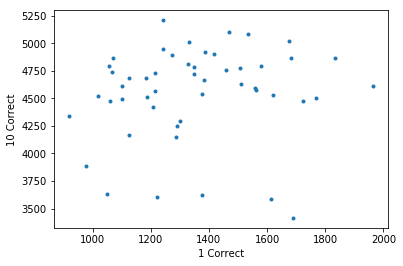

In [64]:
plt.plot(adult_df_1['correct'],adult_df_1['correct_10'],".")
plt.xlabel("1 Correct")
plt.ylabel("10 Correct")
plt.show()

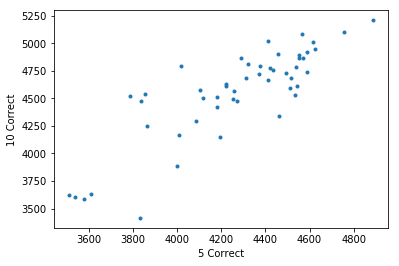

In [65]:
plt.plot(adult_df_1['correct_5'],adult_df_1['correct_10'],".")
plt.xlabel("5 Correct")
plt.ylabel("10 Correct")
plt.show()

In [52]:
notify_me("1/5/10 tests finished")

In [14]:
def get_ensembling(adult_df):
    valids = adult_df[adult_df['correct']>0]
    top_n_mean=(valids['preds'].cumsum())/(np.arange(len(valids))+1)
    top_n_preds = [np.argmax(x,1) for x in top_n_mean]
    top_n_corrects = [np.sum(x==ground_truths) for x in top_n_preds]
    top_n_corrects += [0]*(len(adult_df)-len(valids))
    adult_df['top_n_corrects']=top_n_corrects
    return adult_df

In [29]:
for generation in range(9):
    print("=== GENERATION {} ===".format(generation))
    logging.info("=== GENERATION {} ===".format(generation))
    adult_df = run_petri(pool,data=data,connectivity='linear',cell_types=[1,1],scale=2,epochs=10,verbose=False)
    adult_df = get_ensembling(adult_df)
    display(adult_df)
    adult_df.to_pickle("generations/generation_{}.pkl".format(generation))
    pool = mutate_pool(adult_df, parents=25, children=75, mutation_probability=.25)

=== GENERATION 0 ===


ValueError: max() arg is an empty sequence

In [ ]:
notify_me("10 generations finished! Best model: {}, Corrects: {}".format(pool['name'].iloc[0],pool['correct'].iloc[0]))
notify_me("Best ensemble model: Corrects: {}".format(max(adult_df['top_n_corrects'])))

In [ ]:
adult_df[adult_df['correct']>=adult_df['correct'].quantile(.75)]

In [18]:
pool

,adult,cell,correct,genotype,lineage,loss,mutations,name,offspring,preds,type
0,True,"[[0.0, 1.0, 0.0, 7.0], [0.0, 0.0, 1.0, 0.0], [...",4348,"n: 4, c: 0.384",[],1.9444,0,Sepoy Missy Quakeress,0,"[[-0.33502426743507385, -0.6744508743286133, 0...",sum
1,True,"[[0.0, 1.0, 0.0, 1.0], [0.0, 0.0, 7.0, 11.0], ...",4260,"n: 4, c: 0.25",[],1.8444,0,Schottky Lamar Irvine,0,"[[-1.015431523323059, -0.06938501447439194, 0....",sum
2,True,"[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0....",4470,"n: 7, c: 0.308",[],2.2160,0,Gina Gandhian Forsythe,0,"[[-0.8282103538513184, -1.0901018381118774, 1....",concat
3,True,"[[0.0, 6.0, 0.0, 9.0, 4.0, 6.0], [0.0, 0.0, 4....",4245,"n: 6, c: 0.477",[],1.7053,0,Lotte Plexiglas Corvallis,0,"[[-1.0596058368682861, -1.6361041069030762, 0....",sum
4,True,"[[0.0, 1.0, 15.0, 0.0], [1.0, 0.0, 0.0, 1.0], ...",4593,"n: 4, c: 0.677",[],2.0604,0,Saturday Deane Amoco,0,"[[-1.9259368181228638, -1.7532033920288086, 0....",concat
5,True,"[[0.0, 1.0, 1.0, 14.0, 0.0, 0.0, 1.0], [0.0, 0...",4796,"n: 7, c: 0.687",[],2.3784,0,Ephesus Erik Latinate,0,"[[-1.3781143426895142, -3.539539098739624, 0.5...",sum
6,True,"[[0.0, 12.0, 5.0, 1.0, 6.0, 0.0, 0.0], [0.0, 0...",4639,"n: 7, c: 0.463",[],2.3690,0,England Leander Nikolai,0,"[[-1.7962820529937744, -0.6429231762886047, -0...",sum
7,True,"[[0.0, 12.0, 6.0, 0.0, 15.0, 14.0], [0.0, 0.0,...",3809,"n: 6, c: 0.742",[],3.7557,0,Cesare Cady Jacobus,0,"[[0.2656910717487335, 0.5333871245384216, -0.4...",sum
8,True,"[[0.0, 1.0, 10.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0...",4666,"n: 6, c: 0.324",[],2.1937,0,Epiphany Petersen Bourbaki,0,"[[-1.2962524890899658, -0.6822144389152527, 0....",sum
9,True,"[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0....",3734,"n: 6, c: 0.426",[],1.4658,0,McDermott Marx Middlebury,0,"[[-0.8870079517364502, 0.00567018985748291, 1....",sum
